In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import seaborn as sns

You can use RandomGraph function to create a random graph that returns the graph as both networkx.Graph and adjacency matrix as numpy.array.

You can modify the VisualiseGraph function to give each connected component different graph, or make other interesting visualizations. Play with it however you want!

In [2]:
def RandomAdjacencyMatrix(n = 10, p = 0.5):
    M = np.zeros((n,n), dtype=np.uint8)
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                M[i,j], M[j, i] = 1, 1
    return M

def RandomGraph(n = 10, p = 0.5):
    '''
    Creates a random networkx undirected, unweighted graph
    
    Inputs:
        n: number of nodes in graph
        p: probability of an edge being included
        
    Outputs:
        M: Adjacency matrix as numpy array
        G: nx Graph
        
    '''
    M = RandomAdjacencyMatrix(n, p)
    edges = np.transpose(np.where(M==1))
    
    G = nx.Graph()
    for i in range(edges.shape[0]):
        G.add_edge(edges[i, 0], edges[i, 1])
    
    return G, M

def VisualizeGraph(G):
    nx.draw_networkx(G)
    plt.show()



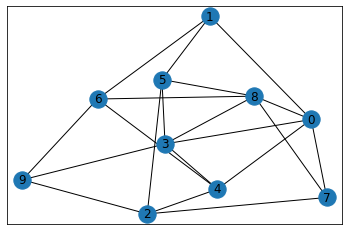

In [3]:
n = 10
p = 0.5
G, M = RandomGraph(n, p)
VisualizeGraph(G)

### Read and visualize the given graph adjacency matrix files. 
The first network is not modular, but the second and third networks are modular. All graphs are binary and blue color represents connected or '1' edges, and white color shows disconnected or '0' edges. There is a hierarchical modularity in network 3, shown in Figures below. 

In [4]:
data_1 = np.load('NetworkData1.npy')
data_2 = np.load('NetworkData2.npy')
data_3 = np.load('NetworkData3.npy')

G1=nx.from_numpy_matrix(data_1)
G2=nx.from_numpy_matrix(data_2)
G3=nx.from_numpy_matrix(data_3)

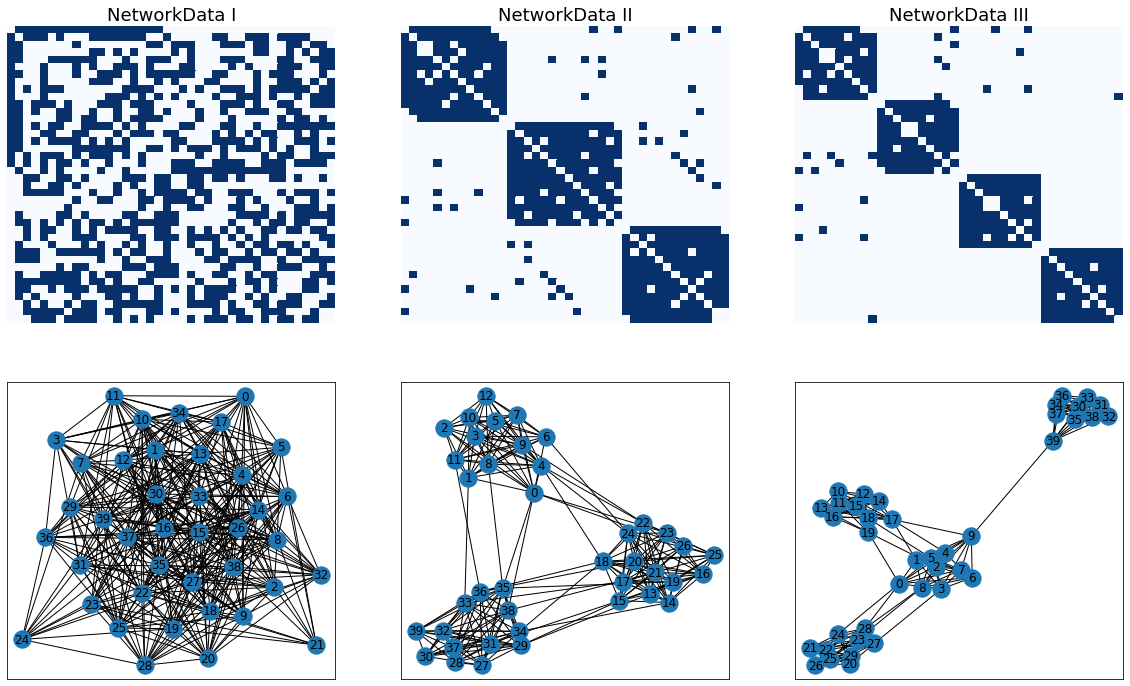

In [5]:
fig, ax = plt.subplots(2,3,figsize=(20,12))

#matrices
fig1 = sns.heatmap(data_1, cmap="Blues",ax=ax[0,0],xticklabels=False, yticklabels=False,cbar=False)
fig2 = sns.heatmap(data_2, cmap="Blues",ax=ax[0,1],xticklabels=False, yticklabels=False,cbar=False)
fig3 = sns.heatmap(data_3, cmap="Blues",ax=ax[0,2],xticklabels=False, yticklabels=False,cbar=False)

#graphs
fig4 = nx.draw_networkx(G1, ax=ax[1,0],labels= None)
fig5 = nx.draw_networkx(G2, ax=ax[1,1])
fig6 = nx.draw_networkx(G3, ax=ax[1,2])


#fig5 = VisualizeGraph(G2)
#fig6 = VisualizeGraph(G3)


ax[0,0].title.set_text('NetworkData I')
ax[0,0].title.set_size(18)

ax[0,1].title.set_text('NetworkData II')
ax[0,1].title.set_size(18)

ax[0,2].title.set_text('NetworkData III')
ax[0,2].title.set_size(18)

plt.show()

### Implement the Girvan-Newman algorithm: 
Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm).

In [6]:
def Girvan_Newman(data):

    G = nx.from_numpy_matrix(data)

    G_orj = nx.Graph.copy(G)

    md_list = []
    cc_listed = []
    cc_list = nx.connected_components(G)
    cc_list = np.array(list(cc_list))
    
    for i in range(G.number_of_edges()):
        
        md = nx_comm.modularity(G_orj,cc_list)
        
        md_list.append(md)
        
        cc_listed.append(cc_list)

        bwn = nx.edge_betweenness_centrality(G) 
        bwn_list = list(bwn.items()) 
        bwn_list = sorted(bwn_list, key = lambda x:x[1], reverse = True) 

        u,v = bwn_list[0][0]
        
        G.remove_edge(u,v)

        cc = nx.connected_components(G)

        cc_list = np.array(list(cc))
            
    max_md = max(md_list)
    
    ind = md_list.index(max_md)

    G = nx.from_numpy_matrix(data)

    for i in range(ind+1):

        bwn = nx.edge_betweenness_centrality(G) 
        bwn_list = list(bwn.items()) 
        bwn_list = sorted(bwn_list, key = lambda x:x[1], reverse = True) 

        u,v = bwn_list[0][0]

        G.remove_edge(u,v)
    
    G_new_mat = nx.to_numpy_matrix(G)

    return max_md, len(cc_listed[ind]), G, G_new_mat

In [7]:
md_1, no_cc_1, G_md_1, G_mat_1 = Girvan_Newman(data_1)
md_2, no_cc_2, G_md_2, G_mat_2 = Girvan_Newman(data_2)
md_3, no_cc_3, G_md_3, G_mat_3 = Girvan_Newman(data_3)

### Visualize the final results.

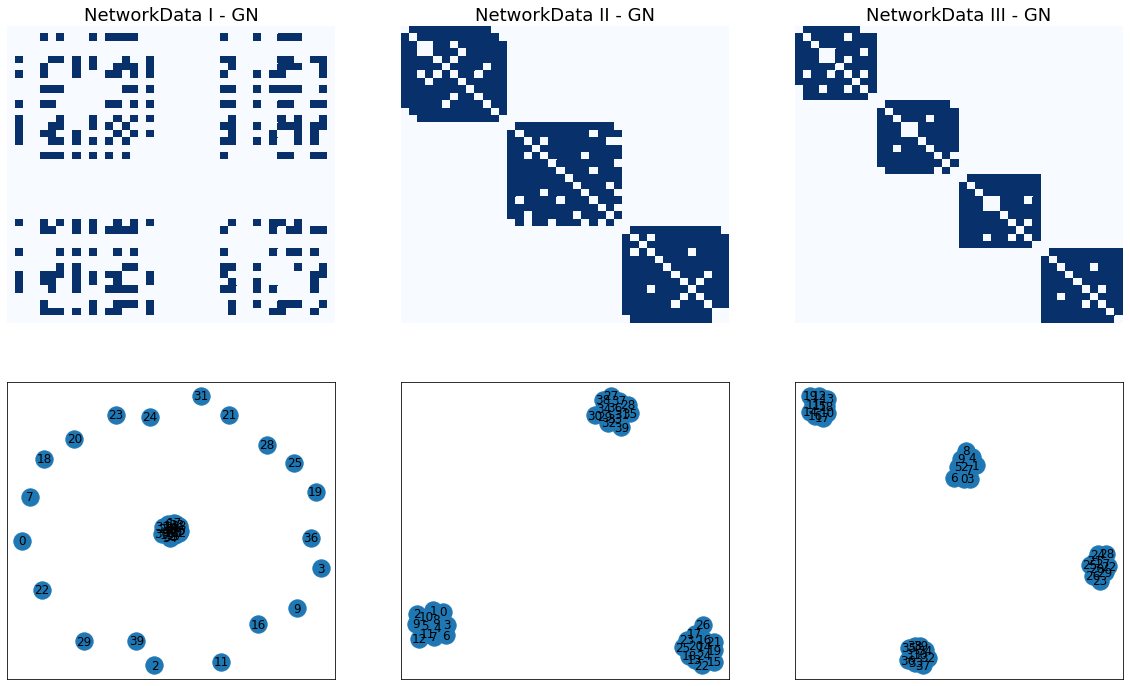

In [8]:
fig, ax = plt.subplots(2,3,figsize=(20,12))

#matrices
fig1 = sns.heatmap(G_mat_1, cmap="Blues",ax=ax[0,0],xticklabels=False, yticklabels=False,cbar=False)
fig2 = sns.heatmap(G_mat_2, cmap="Blues",ax=ax[0,1],xticklabels=False, yticklabels=False,cbar=False)
fig3 = sns.heatmap(G_mat_3, cmap="Blues",ax=ax[0,2],xticklabels=False, yticklabels=False,cbar=False)

#graphs
fig4 = nx.draw_networkx(G_md_1, ax=ax[1,0],labels= None)
fig5 = nx.draw_networkx(G_md_2, ax=ax[1,1])
fig6 = nx.draw_networkx(G_md_3, ax=ax[1,2])

ax[0,0].title.set_text('NetworkData I - GN')
ax[0,0].title.set_size(18)

ax[0,1].title.set_text('NetworkData II - GN')
ax[0,1].title.set_size(18)

ax[0,2].title.set_text('NetworkData III - GN')
ax[0,2].title.set_size(18)

plt.show()

In [9]:
md_1 = round(md_1,2)
md_2 = round(md_2,2)
md_3 = round(md_3,2)

print(f"""
First Graph:
Modularity Value = {md_1} | Number of Modules = {no_cc_1} | Actual Modules = 1
------------------------------------------------------------------------                
Second Graph:
Modularity Value = {md_2} | Number of Modules = {no_cc_2}  | Actual Modules = {no_cc_2}
------------------------------------------------------------------------                
Third Graph:
Modularity Value = {md_3} | Number of Modules = {no_cc_3}  | Actual Modules = {no_cc_3}
------------------------------------------------------------------------""")


First Graph:
Modularity Value = 0.02 | Number of Modules = 21 | Actual Modules = 1
------------------------------------------------------------------------                
Second Graph:
Modularity Value = 0.57 | Number of Modules = 3  | Actual Modules = 3
------------------------------------------------------------------------                
Third Graph:
Modularity Value = 0.68 | Number of Modules = 4  | Actual Modules = 4
------------------------------------------------------------------------


### Conclusions
After implementing the Girvan-Newman algorithm for each given networks, it can be concluded that the algorithm is mathematically powerful to find the number of modules or connected components in a network. Removing edges with respect to their betweenness centrality are also shown in the matrices above. 

Some networks are not composed of hierarchical modules (e,g; Graph 1). Modularity value is very small for this kind of a network. While removing edges from a non-modular graph wrt to their betweenness centrality; peripheral nodes are removed first, and each one of them forms a module (consisted of only one node). Therefore, even if the actual number of modules is one (the graph itself), we calculate more number of modules with the Girvan-Newman, and this could be a weakness for this algorithm.

Maximum modularity value 0.57 for Graph 2 and 0.68 for Graph 3. There are respectively three and four main modules for Graphs 2 and 3. When number of modules increases, modularity value also increases for a network. 